In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [58]:
df_train = pd.read_csv('dataset/train.txt', names=['Text', 'Emotion'], sep=';')
df_val = pd.read_csv('dataset/val.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('dataset/test.txt', names=['Text', 'Emotion'], sep=';')

In [59]:
print(df_train.shape)
df_train.head()

(16000, 2)


,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [60]:
print(df_test.shape)
df_test.head()

(2000, 2)


,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [61]:
print(df_val.shape)
df_val.head()

(2000, 2)


,Text,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [62]:
print(df_train['Emotion'].value_counts())
print('-----------')
print(df_test['Emotion'].value_counts())
print('-----------')
print(df_val['Emotion'].value_counts())

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64
-----------
Emotion
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64
-----------
Emotion
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: count, dtype: int64


In [63]:
print(df_train["Emotion"].value_counts(normalize=True) * 100)
print('-----------')
print(df_test["Emotion"].value_counts(normalize=True) * 100)
print('-----------')
print(df_val["Emotion"].value_counts(normalize=True) * 100)


Emotion
joy         33.51250
sadness     29.16250
anger       13.49375
fear        12.10625
love         8.15000
surprise     3.57500
Name: proportion, dtype: float64
-----------
Emotion
joy         34.75
sadness     29.05
anger       13.75
fear        11.20
love         7.95
surprise     3.30
Name: proportion, dtype: float64
-----------
Emotion
joy         35.20
sadness     27.50
anger       13.75
fear        10.60
love         8.90
surprise     4.05
Name: proportion, dtype: float64


AN IMBALANCED DATASET

<Axes: xlabel='Emotion', ylabel='count'>

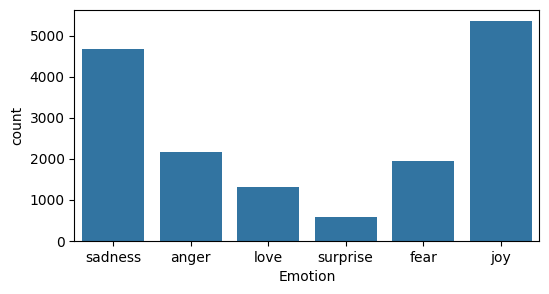

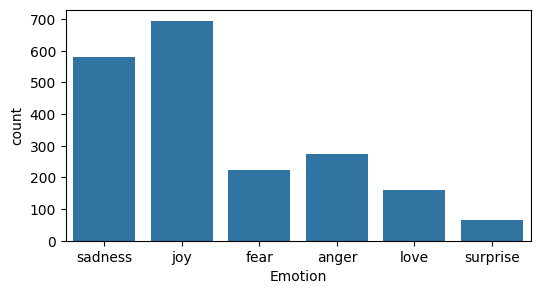

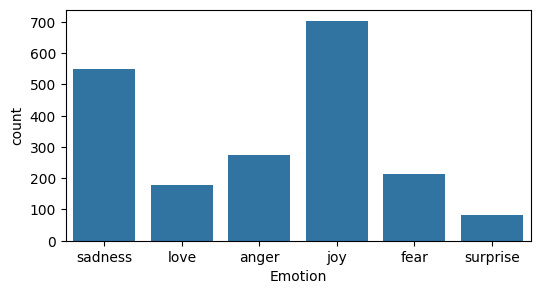

In [64]:
plt.figure(figsize=(6,3))
sns.countplot(x='Emotion', data=df_train)
plt.figure(figsize=(6,3))
sns.countplot(x='Emotion', data=df_test)
plt.figure(figsize=(6,3))
sns.countplot(x='Emotion', data=df_val)

In [65]:
print(df_train.isnull().sum())
print('-----------')
print(df_test.isnull().sum())
print('-----------')
print(df_val.isnull().sum())

Text       0
Emotion    0
dtype: int64
-----------
Text       0
Emotion    0
dtype: int64
-----------
Text       0
Emotion    0
dtype: int64


In [66]:
conflicting_labels_train = df_train[df_train.duplicated(subset=["Text"], keep=False)]
conflicting_labels_test = df_test[df_test.duplicated(subset=["Text"], keep=False)]
conflicting_labels_val = df_val[df_val.duplicated(subset=["Text"], keep=False)]
print(conflicting_labels_train)
print('-----------')
print(conflicting_labels_test)
print('-------------')
print(conflicting_labels_val)

                                                    Text  Emotion
364    i tend to stop breathing when i m feeling stre...  sadness
1501   i feel on the verge of tears from weariness i ...     love
1625   i was intensely conscious of how much cash i h...    anger
1802                    i still feel completely accepted      joy
2908   im still not sure why reilly feels the need to...     fear
...                                                  ...      ...
15315  i will feel as though i am accepted by as well...      joy
15329  i shy away from songs that talk about how i fe...      joy
15572  i bet taylor swift basks in the knowledge that...    anger
15705  i began to feel accepted by gaia on her own terms      joy
15876  i was sitting in the corner stewing in my own ...    anger

[62 rows x 2 columns]
-----------
Empty DataFrame
Columns: [Text, Emotion]
Index: []
-------------
                                                   Text Emotion
300   i have had several new members tell me

In [67]:
df_train = df_train.drop_duplicates(subset=["Text"], keep="first")
print('-----------')
df_test = df_test.drop_duplicates(subset=["Text"], keep="first")
print('-----------')
df_val = df_val.drop_duplicates(subset=["Text"], keep="first")


-----------
-----------


In [68]:
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
# Preprocessing Functions
def apply_lemmatization(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def filter_stop_words(text):
    return " ".join([word for word in text.split() if word not in stop_words])

def strip_numbers(text):
    return re.sub(r'\d+', '', text)

def convert_to_lower(text):
    return text.lower()

def clean_punctuation(text):
    text = re.sub(r'[^\w\s]', ' ', text)  # Removes punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Removes extra spaces
    return text

def eliminate_urls(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

# Unified Text Preprocessing Function
def text_pipeline(text):
    text = convert_to_lower(text)
    text = eliminate_urls(text)
    text = strip_numbers(text)
    text = clean_punctuation(text)
    text = filter_stop_words(text)
    text = apply_lemmatization(text)
    return text

In [70]:
df_train["Text"] = df_train["Text"].apply(text_pipeline)
df_test["Text"] = df_test["Text"].apply(text_pipeline)
df_val["Text"] = df_val["Text"].apply(text_pipeline)


In [71]:
print(df_train["Text"].head())
print('-----------')
print(df_test["Text"].head())
print('-----------')
print(df_val["Text"].head())

0                                didnt feel humiliated
1    go feeling hopeless damned hopeful around some...
2            im grabbing minute post feel greedy wrong
3    ever feeling nostalgic fireplace know still pr...
4                                      feeling grouchy
Name: Text, dtype: object
-----------
0          im feeling rather rotten im ambitious right
1                         im updating blog feel shitty
2      never make separate ever want feel like ashamed
3    left bouquet red yellow tulip arm feeling slig...
4                              feeling little vain one
Name: Text, dtype: object
-----------
0             im feeling quite sad sorry ill snap soon
1    feel like still looking blank canvas blank pie...
2                           feel like faithful servant
3                                  feeling cranky blue
4                                treat feeling festive
Name: Text, dtype: object


In [72]:
df_train.to_csv('preprocessed_dataset/train.csv', index=False)
df_test.to_csv('preprocessed_dataset/test.csv', index=False)
df_val.to_csv('preprocessed_dataset/val.csv', index=False)